# Neural Network
- Train neural network classifier
- Try different configurations

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
df_train = pd.read_csv("train_data.csv") 
print(df_train.shape)

df_test = pd.read_csv("test_data.csv")
print(df_test.shape)

(1899, 201)
(790, 201)


In [3]:
df1_train = df_train.dropna()
print(df1_train.shape)

df1_test = df_test.dropna()
print(df1_test.shape)

(1899, 201)
(790, 201)


In [4]:
df2_train = df1_train.values
print(df2_train.shape)

df2_test = df1_test.values
print(df2_test.shape)

(1899, 201)
(790, 201)


In [5]:
X_train = df2_train[:,:200]
Y_train = df2_train[:,200]
X_test = df2_test[:,:200]
Y_test = df2_test[:,200]

In [6]:
clf1 = MLPClassifier(activation = 'relu', hidden_layer_sizes = (200,200))
clf2 = MLPClassifier(activation = 'relu', hidden_layer_sizes = (100,50))
clf3 = MLPClassifier(activation = 'relu', hidden_layer_sizes = (50,10))

In [7]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf3.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
Y_hat1 = clf1.predict(X_test)
Y_hat_train_1 = clf1.predict(X_train)
score1 = np.sum(Y_hat1 == Y_test)/len(Y_test)
score1_train = np.sum(Y_hat_train_1 == Y_train)/len(Y_train)

Y_hat2 = clf2.predict(X_test)
Y_hat_train_2 = clf2.predict(X_train)
score2 = np.sum(Y_hat2 == Y_test)/len(Y_test)
score2_train = np.sum(Y_hat_train_2 == Y_train)/len(Y_train)

Y_hat3 = clf3.predict(X_test)
Y_hat_train_3 = clf3.predict(X_train)
score3 = np.sum(Y_hat2 == Y_test)/len(Y_test)
score3_train = np.sum(Y_hat_train_3 == Y_train)/len(Y_train)

print('(200,200) hidden layers: test score={}, train score={}'.format(score1,score1_train))
print('(100,50) hidden layers: test score={}, train score={}'.format(score2,score2_train))
print('(50,10) hidden layers: test score={}, train score={}'.format(score3,score3_train))

(200,200) hidden layers: test score=0.8240506329113924, train score=1.0
(100,50) hidden layers: test score=0.8367088607594937, train score=1.0
(50,10) hidden layers: test score=0.8367088607594937, train score=1.0


In [9]:
## Looks like (200,200) works the best
## Try different activation functions
clf_relu = MLPClassifier(activation = 'relu', hidden_layer_sizes = (200,200))
clf_tanh = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (200,200))
clf_log = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (200,200))

In [10]:
clf_relu.fit(X_train,Y_train)
clf_tanh.fit(X_train,Y_train)
clf_log.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
Y_hat1 = clf_relu.predict(X_test)
Y_hat_train_1 = clf_relu.predict(X_train)
score1 = np.sum(Y_hat1 == Y_test)/len(Y_test)
score1_train = np.sum(Y_hat_train_1 == Y_train)/len(Y_train)

Y_hat2 = clf_tanh.predict(X_test)
Y_hat_train_2 = clf_tanh.predict(X_train)
score2 = np.sum(Y_hat2 == Y_test)/len(Y_test)
score2_train = np.sum(Y_hat_train_2 == Y_train)/len(Y_train)

Y_hat3 = clf_log.predict(X_test)
Y_hat_train_3 = clf_log.predict(X_train)
score3 = np.sum(Y_hat2 == Y_test)/len(Y_test)
score3_train = np.sum(Y_hat_train_3 == Y_train)/len(Y_train)

print('relu: test score={}, train score={}'.format(score1,score1_train))
print('tanh: test score={}, train score={}'.format(score2,score2_train))
print('logistic: test score={}, train score={}'.format(score3,score3_train))

## Looks like Relu works the best

relu: test score=0.8430379746835444, train score=1.0
tanh: test score=0.859493670886076, train score=1.0
logistic: test score=0.859493670886076, train score=1.0


In [12]:
## Try different alpha parameter "L2 penalty"
alpha = [1e-05,1e-04,1e-03,1e-02,1e-01,1,10,100,1000]
score_train_list = np.zeros(len(alpha))
score_test_list = np.zeros(len(alpha))
for i in range(len(alpha)):
    clf = MLPClassifier(activation = 'relu', hidden_layer_sizes = (200,200),
                       alpha = alpha[i])
    clf.fit(X_train,Y_train)
    Y_hat = clf.predict(X_test)
    Y_hat_train_ = clf.predict(X_train)
    score_test_list[i] = np.sum(Y_hat == Y_test)/len(Y_test)
    score_train_list[i]= np.sum(Y_hat_train_ == Y_train)/len(Y_train)

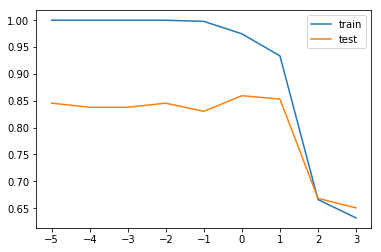

In [13]:
plt.figure()
plt.plot(np.log10(alpha),score_train_list)
plt.plot(np.log10(alpha),score_test_list)
plt.legend(['train','test'])
plt.show()

In [14]:
## The train score was initially at 1 for low alpha, which indicates that 
## there is overfitting. When alpha increase, we can see that train score
## decrease but test score increase, indicating improving generalization.
## We choose a value near 10 as our final configuration
clf = MLPClassifier(activation = 'relu', hidden_layer_sizes = (200,200),
                       alpha = 10)

In [15]:
clf.fit(X_train,Y_train)
Y_hat = clf.predict(X_test)
score_test = np.sum(Y_hat == Y_test)/len(Y_test)

In [16]:
print(score_test)

0.8696202531645569
